In [12]:
from db_utils import *
from wgan import *
from gen import *
from critic import *

In [13]:
db_train, db_test = load_data(0.8)

(327680, 2000, 1)
10.273698864467972 -9.970374739869616
1.0 -1.0


In [27]:
run = 34
number = 198
path_gen = f'runs/{run}/{number}_gen.h5'
path_critic = f'runs/{run}/{number}_critic.h5'
gen = load_model(path_gen)
critic = load_model(path_critic)
critic.trainable = True

W0717 16:02:52.339962 47905375489536 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0717 16:02:53.777584 47905375489536 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [28]:
wgan = WGANGP(gen, critic, noise_dim=100, n_critic=5, batch_size=500, text='prova')
wgan.train(200, db_train, db_test)


NCRITIC = 5

Gen_Iter:      0 [D loss: -1.33e-02] [d_loss_test: 0.00e+00] [G loss: 1.71e+00]
Gen_Iter:      1 [D loss: -3.58e-02] [d_loss_test: 0.00e+00] [G loss: 2.72e+00]
Gen_Iter:      2 [D loss: -3.74e-02] [d_loss_test: 0.00e+00] [G loss: 2.71e+00]
Gen_Iter:      3 [D loss: -5.30e-02] [d_loss_test: 0.00e+00] [G loss: 2.58e+00]
Gen_Iter:      4 [D loss: -5.54e-02] [d_loss_test: 0.00e+00] [G loss: 2.68e+00]
Gen_Iter:      5 [D loss: -6.78e-02] [d_loss_test: 0.00e+00] [G loss: 2.10e+00]
Gen_Iter:      6 [D loss: -2.04e-02] [d_loss_test: 0.00e+00] [G loss: 2.11e+00]
Gen_Iter:      7 [D loss: -2.28e-02] [d_loss_test: 0.00e+00] [G loss: 2.42e+00]
Gen_Iter:      8 [D loss: -9.30e-02] [d_loss_test: 0.00e+00] [G loss: 2.61e+00]
Gen_Iter:      9 [D loss: -1.03e-01] [d_loss_test: 0.00e+00] [G loss: 2.80e+00]
Gen_Iter:     10 [D loss: -4.71e-02] [d_loss_test: 0.00e+00] [G loss: 3.17e+00]
Gen_Iter:     11 [D loss: -6.97e-02] [d_loss_test: 0.00e+00] [G loss: 2.12e+00]
Gen_Iter:     12 [D loss: 

KeyboardInterrupt: 

In [61]:
gen.save_weights('gen_weights.h5',overwrite=True)
critic.save_weights('critic_weights.h5',overwrite=True)
gen_arch = gen.to_json()
critic_arch = critic.to_json()

In [62]:
from tensorflow.keras.models import model_from_json
gennn = model_from_json(gen_arch)
criticnn = model_from_json(critic_arch)
criticnn.load_weights("critic_weights.h5")
gennn.load_weights("gen_weights.h5")

In [10]:
fs=(100,1)
fm=128
init_sigma = 0.003
init_mean = 0.0
alpha = 0.2
# scrivo stringa info log gen #
genn = build_generator(fs,fm,init_sigma,init_mean,alpha,100)
fs = 100
fm = 128
init_sigma = 0.02
init_mean = 0.0
alpha = 0.2
criticn = build_critic(fs,fm,init_sigma,init_mean,alpha)

W0717 15:29:49.892136 47905375489536 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0717 15:29:50.682850 47905375489536 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3200)              323200    
_________________________________________________________________
re_lu (ReLU)                 (None, 3200)              0         
_________________________________________________________________
reshape (Reshape)            (None, 25, 1, 128)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 1, 128)        512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 125, 1, 64)        819264    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 125, 1, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 1, 64)        2

In [45]:
genn.load_weights('prova-pesi-gen.h5')
criticn.load_weights('prova-pesi-critic.h5')

In [16]:
noise = np.random.normal(0,1,(1,100))

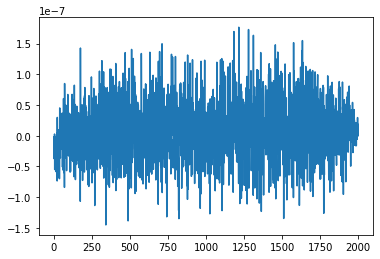

In [17]:
traj = genn.predict(noise)

plt.plot(traj[0])

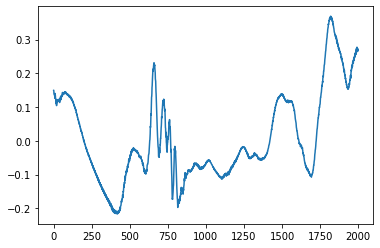

In [26]:
traj = gen.predict(noise)

plt.plot(traj[0])

In [18]:
traj = gennn.predict(noise)

plt.plot(traj[0])

NameError: name 'gennn' is not defined